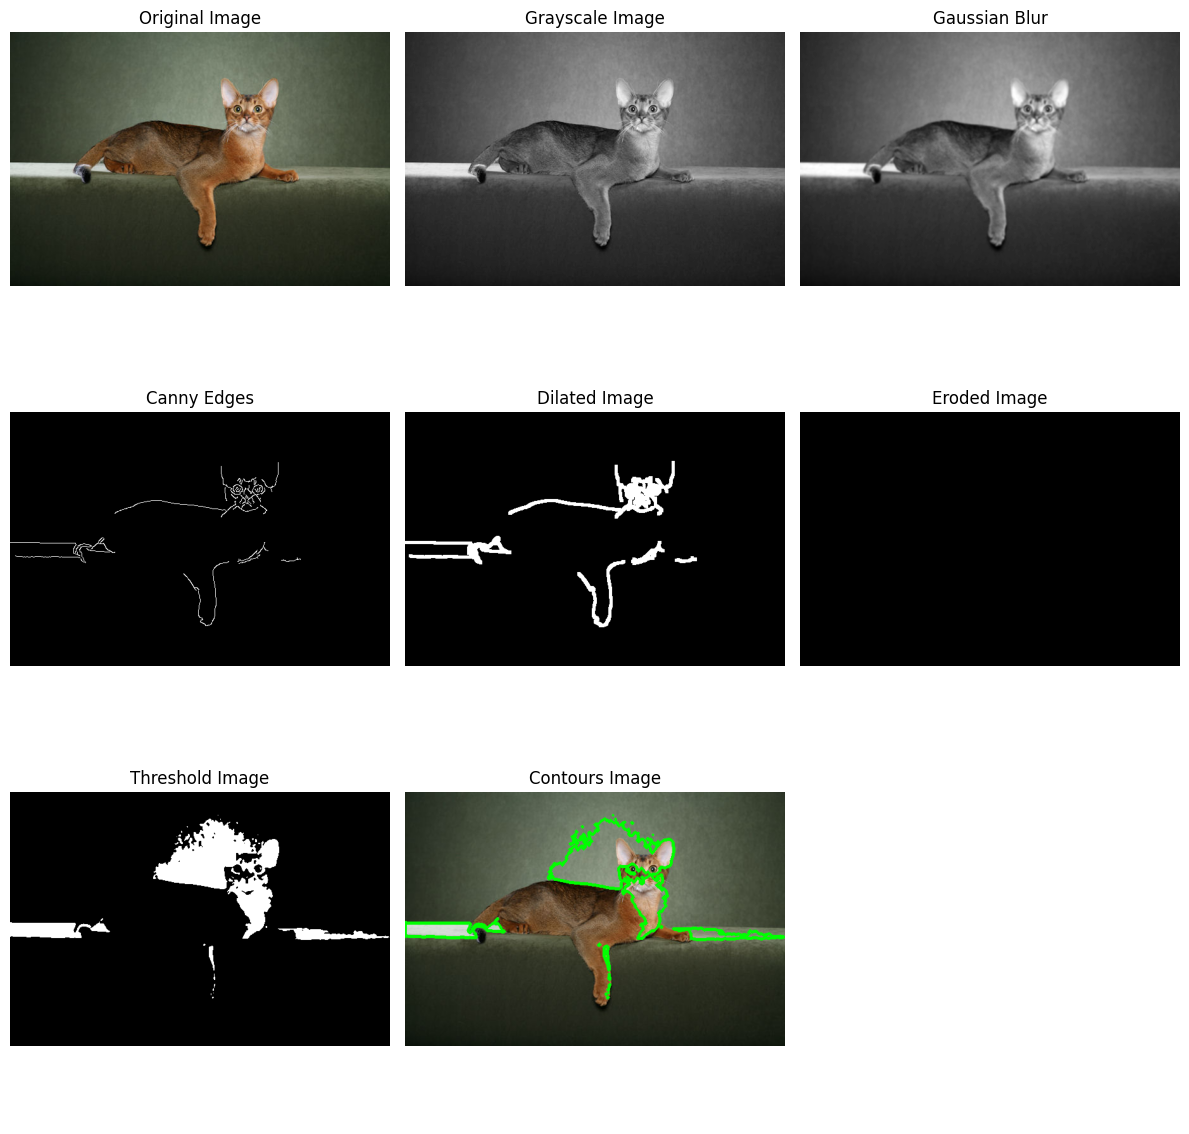

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
image_path = 'img/Abyssinian_1.jpg'  # 修改为你图片的路径
image = cv2.imread(image_path)

# 1. 图像预处理：灰度化
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. 高斯滤波：去噪
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. 边缘检测：Canny边缘检测
edges = cv2.Canny(blurred_image, 100, 200)

# 4. 形态学操作：膨胀
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1)

# 5. 形态学操作：腐蚀
eroded_image = cv2.erode(edges, kernel, iterations=1)

# 6. 二值化
_, threshold_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

# 7. 轮廓检测：提取轮廓
contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 3)

# 可视化每个步骤
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# 显示原图
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# 显示灰度图
axs[0, 1].imshow(gray_image, cmap='gray')
axs[0, 1].set_title('Grayscale Image')
axs[0, 1].axis('off')

# 显示高斯滤波图
axs[0, 2].imshow(blurred_image, cmap='gray')
axs[0, 2].set_title('Gaussian Blur')
axs[0, 2].axis('off')

# 显示Canny边缘检测
axs[1, 0].imshow(edges, cmap='gray')
axs[1, 0].set_title('Canny Edges')
axs[1, 0].axis('off')

# 显示膨胀后的图像
axs[1, 1].imshow(dilated_image, cmap='gray')
axs[1, 1].set_title('Dilated Image')
axs[1, 1].axis('off')

# 显示腐蚀后的图像
axs[1, 2].imshow(eroded_image, cmap='gray')
axs[1, 2].set_title('Eroded Image')
axs[1, 2].axis('off')

# 显示二值化图像
axs[2, 0].imshow(threshold_image, cmap='gray')
axs[2, 0].set_title('Threshold Image')
axs[2, 0].axis('off')

# 显示轮廓图
axs[2, 1].imshow(cv2.cvtColor(contours_image, cv2.COLOR_BGR2RGB))
axs[2, 1].set_title('Contours Image')
axs[2, 1].axis('off')

# 剩余的空白位置
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()


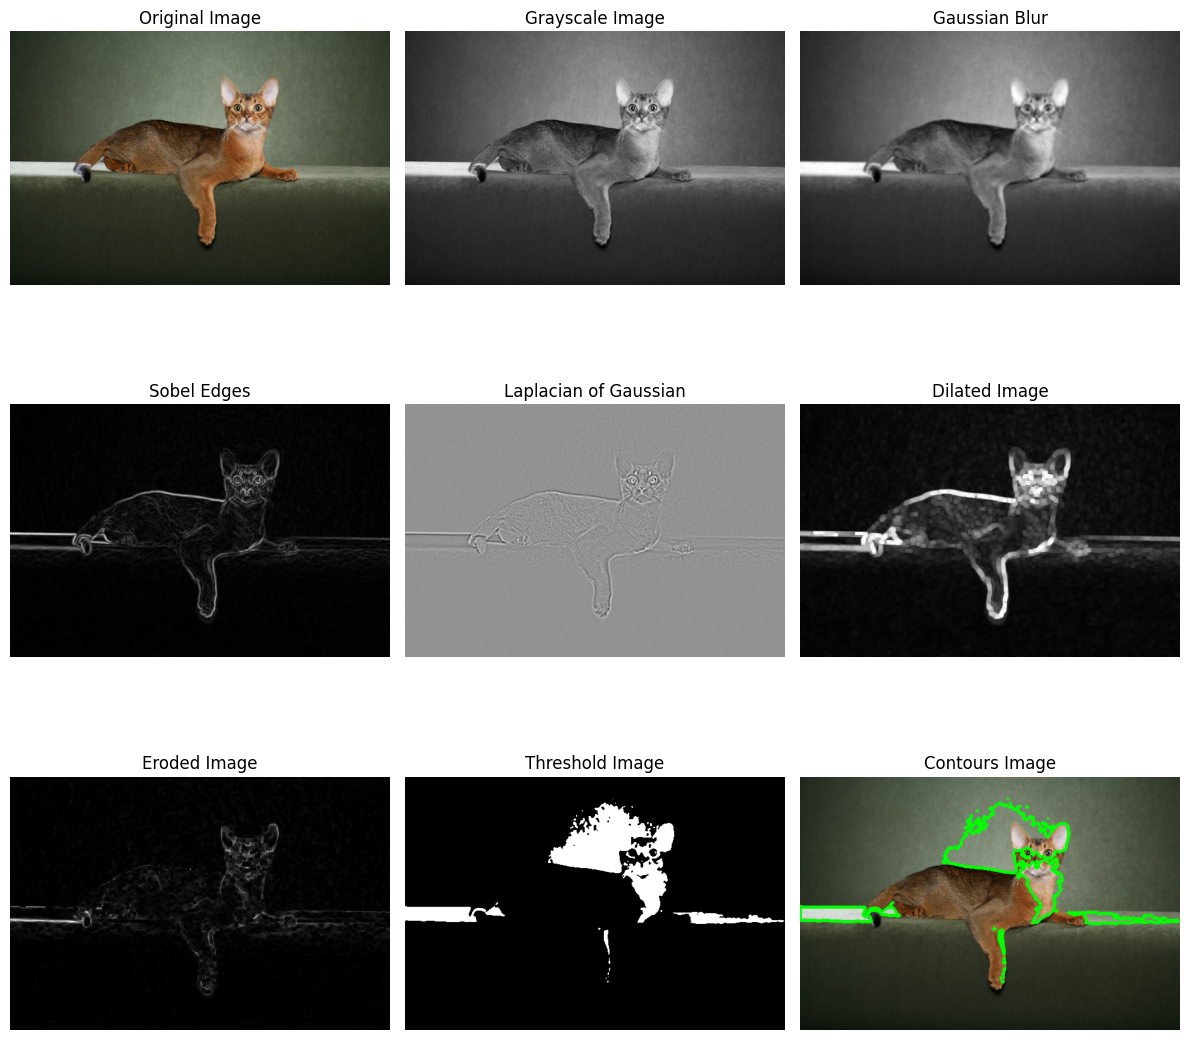

In [2]:
# 1. 图像预处理：灰度化
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. 高斯滤波：去噪
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. 边缘检测 - Sobel
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# 4. 边缘检测 - Laplacian of Gaussian (LoG)
log_edges = cv2.Laplacian(blurred_image, cv2.CV_64F)

# 5. 形态学操作：膨胀
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(sobel_edges.astype(np.uint8), kernel, iterations=1)

# 6. 形态学操作：腐蚀
eroded_image = cv2.erode(sobel_edges.astype(np.uint8), kernel, iterations=1)

# 7. 二值化
_, threshold_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

# 8. 轮廓检测：提取轮廓
contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 3)

# 可视化每个步骤
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# 显示原图
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# 显示灰度图
axs[0, 1].imshow(gray_image, cmap='gray')
axs[0, 1].set_title('Grayscale Image')
axs[0, 1].axis('off')

# 显示高斯滤波图
axs[0, 2].imshow(blurred_image, cmap='gray')
axs[0, 2].set_title('Gaussian Blur')
axs[0, 2].axis('off')

# 显示Sobel边缘检测结果
axs[1, 0].imshow(sobel_edges, cmap='gray')
axs[1, 0].set_title('Sobel Edges')
axs[1, 0].axis('off')

# 显示LoG边缘检测结果
axs[1, 1].imshow(log_edges, cmap='gray')
axs[1, 1].set_title('Laplacian of Gaussian')
axs[1, 1].axis('off')

# 显示膨胀后的图像
axs[1, 2].imshow(dilated_image, cmap='gray')
axs[1, 2].set_title('Dilated Image')
axs[1, 2].axis('off')

# 显示腐蚀后的图像
axs[2, 0].imshow(eroded_image, cmap='gray')
axs[2, 0].set_title('Eroded Image')
axs[2, 0].axis('off')

# 显示二值化图像
axs[2, 1].imshow(threshold_image, cmap='gray')
axs[2, 1].set_title('Threshold Image')
axs[2, 1].axis('off')

# 显示轮廓图
axs[2, 2].imshow(cv2.cvtColor(contours_image, cv2.COLOR_BGR2RGB))
axs[2, 2].set_title('Contours Image')
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()